In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]
import matplotlib.pyplot as plt

import utils

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
    return df

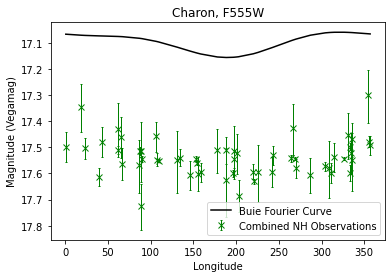

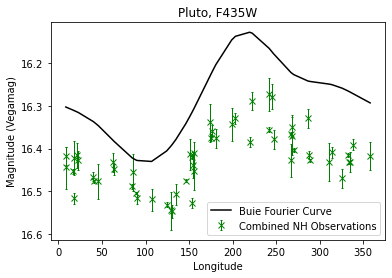

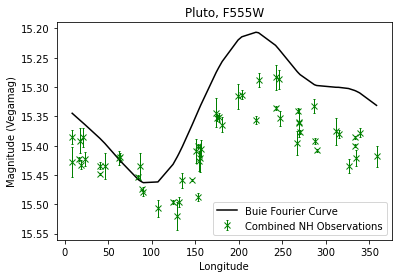

In [7]:
def show_curve(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target}, {bandpass}")

    df = read_file(f"output/{data_file}.json")
    df_upper_bound = read_file(f"output/{data_file}_upper.json")
    df_lower_bound = read_file(f"output/{data_file}_lower.json")

    upper_err = df_upper_bound.multi_vegamag - df.multi_vegamag
    lower_err = df.multi_vegamag - df_lower_bound.multi_vegamag
    yerr = [lower_err, upper_err]


    plt.errorbar(df.lon, df.multi_vegamag, yerr=yerr, 
                 fmt='x', c='green', elinewidth=1, capsize=1,
                 label='Combined NH Observations')
    plt.plot(df.lon, df.fourier_vegamag, c='black', label='Buie Fourier Curve')

    plt.xlabel("Longitude")
    plt.ylabel("Magnitude (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = data_file + '_lon.jpg'
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

# show_curve("charon_435")
show_curve("charon_555")
show_curve("pluto_435")
show_curve("pluto_555")

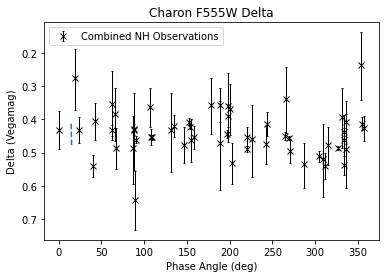

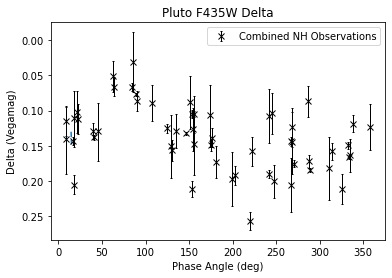

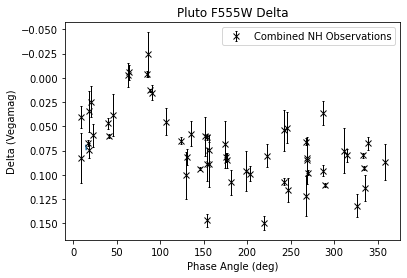

In [5]:
def show_err(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass} Delta")

    df = read_file(f"output/{data_file}.json")
    df_upper_bound = read_file(f"output/{data_file}_upper.json")
    df_lower_bound = read_file(f"output/{data_file}_lower.json")
    
    upper_err = df_upper_bound.multi_vegamag_delta - df.multi_vegamag_delta
    lower_err = df.multi_vegamag_delta - df_lower_bound.multi_vegamag_delta
    yerr = [lower_err, upper_err]


    plt.errorbar(df.lon, df.multi_vegamag_delta, yerr=yerr, 
                 fmt='x', c='black', elinewidth=1, capsize=1,
                 label='Combined NH Observations')

    # Fits
    fit = np.polyfit(df.phase, df.multi_vegamag_delta, 1)
    x = [df.phase.min(), df.phase.max()]
    plt.plot(x, np.poly1d(fit)(x), '--')

    plt.xlabel("Phase Angle (deg)")
    plt.ylabel("Delta (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = data_file + '_delta.jpg'
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

    
# show_err("charon_435")
show_err("charon_555")
show_err("pluto_435")
show_err("pluto_555")